In [ ]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
# from qiskit_aer import AerSimulator
import numpy as np

from parse_qiskit import *

circ = QuantumCircuit(6, 6)
idx0 = list(range(5))

prepare_5perfect_code(circ, idx0)
gateLength = len(circ.data)
circ.cx(0,5)
circ.h(5)
circ.cx(5,1)
circ.cx(5,2)
circ.h(5)
circ.cx(3,5)

ts = parse_qiskit(circ)
measList = applyFinalMeasurement(ts, 'Z', [5], 6)
# measList = applyFinalMeasurement(ts, 'ZXXZI', [0,1,2,3,4], 5)

op00 = pyqreach.QOperation(["000000"])
ts.setAnnotation([[0, op00]])
ts.computingFixedPointPost()
ts.printSupp(gateLength)
ts.printSupp(measList[0])

Location 17: upperBound support = 
Support vectors:
Identity operator.
Location 17: lowerBound support = 
Support vectors:
(0.25,0)|00000000> + (0.25,0)|00011000> + (-0.25,0)|00101000> + (0.25,0)|00110000> + (-0.25,0)|01001000> + (-0.25,0)|01010000> + (0.25,0)|01100000> + (-0.25,0)|01111000> + (0.25,0)|10001000> + (-0.25,0)|10010000> + (-0.25,0)|10100000> + (-0.25,0)|10111000> + (0.25,0)|11000000> + (-0.25,0)|11011000> + (-0.25,0)|11101000> + (-0.25,0)|11110000>
Location 24: upperBound support = 
Support vectors:
Identity operator.
Location 24: lowerBound support = 
Support vectors:
(0.25,0)|00000000> + (0.25,0)|00011000> + (-0.25,0)|00101000> + (0.25,0)|00110000> + (-0.25,0)|01001000> + (-0.25,0)|01010000> + (0.25,0)|01100000> + (-0.25,0)|01111000> + (0.25,0)|10001000> + (-0.25,0)|10010000> + (-0.25,0)|10100000> + (-0.25,0)|10111000> + (0.25,0)|11000000> + (-0.25,0)|11011000> + (-0.25,0)|11101000> + (-0.25,0)|11110000>


In [1]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
# from qiskit_aer import AerSimulator
import numpy as np

from parse_qiskit import *

circ = QuantumCircuit(5, 5)
idx0 = list(range(5))

prepare_5perfect_code(circ, idx0)
gateLength = len(circ.data)

ts = parse_qiskit(circ)
measList = applyFinalMeasurement(ts, 'ZXXZI', [0,1,2,3,4], 5)
# measList = applyFinalMeasurement(ts, 'ZXXZI', [0,1,2,3,4], 5)
oph1 = pyqreach.QOperation("H", 5, [1], [])
oph2 = pyqreach.QOperation("H", 5, [2], [])
newMeasList = []
for measLoc in measList:
    ts.addLocation(pyqreach.Location(5, 0))
    ts.addRelation(measLoc, ts.getLocationNum() - 1, oph1)
    ts.addLocation(pyqreach.Location(5, 0))
    ts.addRelation(ts.getLocationNum() - 2, ts.getLocationNum() - 1, oph2)
    newMeasList.append(ts.getLocationNum() - 1)


op00 = pyqreach.QOperation(["00000"])
ts.setAnnotation([[0, op00]])
ts.computingFixedPointPost()
ts.printSupp(gateLength)
ts.printSupp(55)
visualize_transition_system(ts, 'test_decode')

Location 17: upperBound support = 
Support vectors:
Identity operator.
Location 17: lowerBound support = 
Support vectors:
(0.25,0)|00000000> + (0.25,0)|00011000> + (-0.25,0)|00101000> + (0.25,0)|00110000> + (-0.25,0)|01001000> + (-0.25,0)|01010000> + (0.25,0)|01100000> + (-0.25,0)|01111000> + (0.25,0)|10001000> + (-0.25,0)|10010000> + (-0.25,0)|10100000> + (-0.25,0)|10111000> + (0.25,0)|11000000> + (-0.25,0)|11011000> + (-0.25,0)|11101000> + (-0.25,0)|11110000>
Location 55: upperBound support = 
Support vectors:
Identity operator.
Location 55: lowerBound support = 
Support vectors:
(0.125,0)|00000000> + (-0.125,0)|00001000> + (0.125,0)|00100000> + (-0.125,0)|00101000> + (0.125,0)|01000000> + (-0.125,0)|01001000> + (0.125,0)|01100000> + (-0.125,0)|01101000>


In [1]:
import pyqreach
### Verifiable quantum secret sharing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
# from qiskit_aer import AerSimulator
import numpy as np

from parse_qiskit import *

circ = QuantumCircuit(7,7)
idx0 = list(range(7))
circ.x(6)
prepare_steane_code(circ, idx0)
ts = parse_qiskit(circ)
op00 = pyqreach.QOperation(["0000000"])
ts.setAnnotation([[0, op00]])
ts.computingFixedPointPost()
ts.printSupp(ts.getLocationNum() - 1)

Location 15: upperBound support = 
Support vectors:
Identity operator.
Location 15: lowerBound support = 
Support vectors:
(0.35355,0)|00001110> + (0.35355,0)|00110010> + (0.35355,0)|01010100> + (0.35355,0)|01101000> + (0.35355,0)|10011000> + (0.35355,0)|10100100> + (0.35355,0)|11000010> + (0.35355,0)|11111110>


In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from parse_qiskit import prepare_steane_code

circ = QuantumCircuit(14, 14)

### The dealer's state
circ.initialize(0,0)
# circ.initialize(1,0)

# circ.h(0)
# circ.h(1)
# circ.h(2)
# circ.cx(0, 3)
# circ.cx(6, 4)
# circ.cx(6, 5)
# circ.cx(1, 3)
# circ.cx(0, 5)
# circ.cx(2, 3)
# circ.cx(1, 4)
# circ.cx(0, 6)
# circ.cx(2, 4)
# circ.cx(1, 6)
# circ.cx(2, 5)

prepare_steane_code(circ, list(range(7)))
circ.h(7)
prepare_steane_code(circ, list(range(7, 14)))
for i in range(7):
    circ.cx(i, 7+i)


# circ.save_statevector()

# simulater = AerSimulator(method='statevector')
# circ = transpile(circ, simulater)

# result = simulater.run(circ).result()
# sv = result.get_statevector(circ)

sv = Statevector.from_instruction(circ)

meas_bits = list(range(6, 14))
meas_result, collapsed_state = sv.measure(meas_bits)

print(meas_result)
print(collapsed_state)

01111001
Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [23]:
from IPython.display import Latex
from qiskit.visualization import state_visualization
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(sv.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from parse_qiskit import prepare_steane_code

circ = QuantumCircuit(2,2)
circ.initialize(0,0)
circ.h(0)
circ.cx(0,1)
state = Statevector.from_instruction(circ)

meas_result, collapsed_state = state.measure([1])


In [19]:
print(collapsed_state)
print(meas_result)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
0


Time taken for transpiling: 0.47 seconds


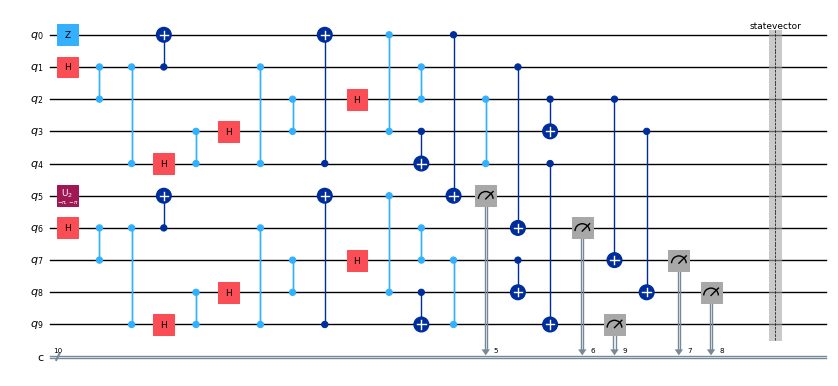

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(10, 10)

# circ.x(0)

prepare_5perfect_code(circ, [0,1,2,3,4])
gateLength = len(circ.data)

circ.h(5)
prepare_5perfect_code(circ, [5,6,7,8,9])

for i in range(5):
    circ.cx(i, 5+i)
circ.measure([5,6,7,8,9], [5,6,7,8,9])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")

circ.draw('mpl', scale=0.5, filename='test_513_bug1_circ.png')

Time taken for transpiling: 0.21 seconds


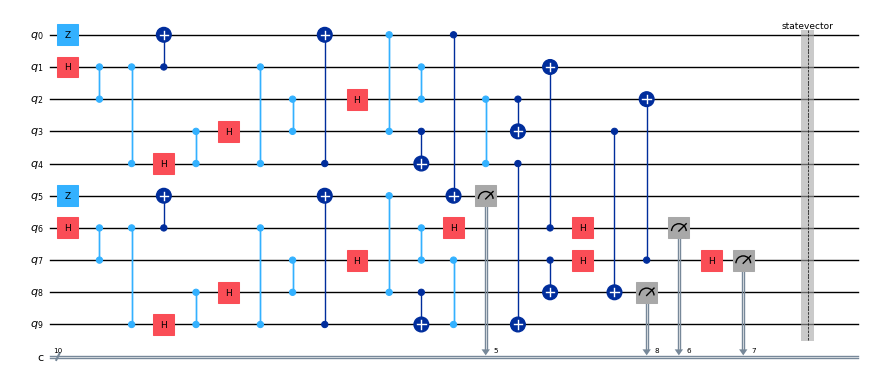

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(10, 10)

prepare_5perfect_code(circ, [0,1,2,3,4])
prepare_5perfect_code(circ, [5,6,7,8,9])

# for i in range(5):
#     circ.cx(i, 5+i)

circ.cx(0,5)
circ.h(6)
circ.cx(6,1)
circ.h(6)
circ.h(7)
circ.cx(7,2)
circ.h(7)
circ.cx(3,8)
circ.cx(4,9)

circ.measure([5,6,7,8], [5,6,7,8])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")

circ.draw('mpl', scale=0.5, filename='test_513_bug2_circ.png')

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(7, 7)

circ.x(6)
prepare_steane_code(circ, [0,1,2,3,4,5,6])

state = Statevector.from_instruction(circ)

from IPython.display import Latex
from qiskit.visualization import state_visualization
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(state.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

Time taken for transpiling: 0.20 seconds


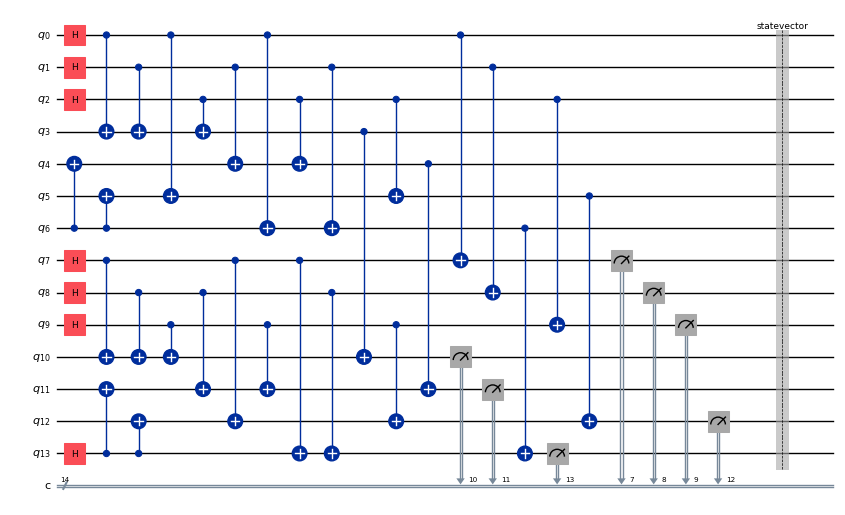

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

circ = QuantumCircuit(14, 14)

prepare_steane_code(circ, list(range(7)))
circ.h(13)
prepare_steane_code(circ, list(range(7, 14)))
for i in range(7):
    circ.cx(i, 7+i)

circ.measure([7,8,9,10,11,12,13], [7,8,9,10,11,12,13])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")
sv = result.get_statevector(circ)

circ.draw('mpl', scale=0.5, filename='test_steane_circ.png')

Time taken for transpiling: 0.04 seconds


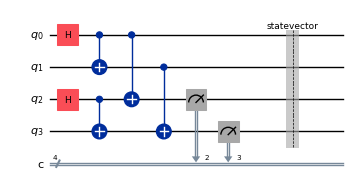

In [7]:
circ = QuantumCircuit(4,4)
circ.h(0)
circ.cx(0,1)
circ.h(2)
circ.cx(2,3)

circ.cx(0,2)
circ.cx(1,3)
circ.measure([2,3], [2,3])

circ.save_statevector()

simulater = AerSimulator(method='statevector')

circ = transpile(circ, simulater)
time_start = time()
result = simulater.run(circ).result()
time_end = time()
print(f"Time taken for transpiling: {time_end - time_start:.2f} seconds")
circ.draw('mpl', scale=0.5, filename='test_ent_circ.png')

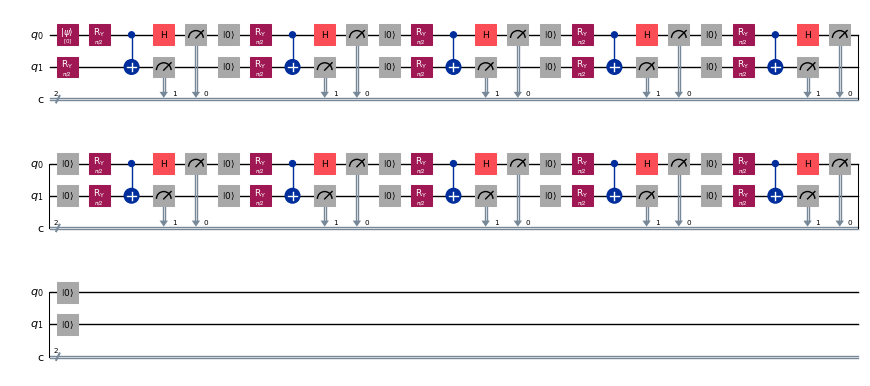

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import numpy as np
from time import time
from parse_qiskit import prepare_steane_code, prepare_5perfect_code

def p_coin(circ: QuantumCircuit, p: float, k: int):
    par = 2 * np.arccos(np.sqrt(p))
    for i in range(k):
        circ.ry(par, 0)
        circ.ry(par, 1)
        circ.cx(0, 1)
        circ.h(0)
        circ.measure(0, 0)
        circ.measure(1, 1)
        circ.reset(0)
        circ.reset(1)

circ = QuantumCircuit(2, 2)
circ.initialize(0, 0)
p_coin(circ, 0.5, 10)
circ.draw('mpl', scale=0.5)